# Malaria Detection using CNN

In [1]:
pwd

'/home/wsuser/work'

In [2]:
# Installing Packages
!pip install keras==2.2.4
!pip install tensorflow==1.14.0

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 312 kB 23.2 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |█████████████████

## 1. Import Libraries

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/s

## 2. Import Dataset

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e3f18113a9004c37a71ba96538b7d0a9 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_e3f18113a9004c37a71ba96538b7d0a9 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_e3f18113a9004c37a71ba96538b7d0a9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fm9zELxm9QanSisVN3cqEgC4amj05wZjr3HaXCif0pA5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e3f18113a9004c37a71ba96538b7d0a9)

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_e3f18113a9004c37a71ba96538b7d0a9.get_object(Bucket='malariadetection-donotdelete-pr-4smzsi8gu1z77u', Key='cell_images.zip')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [5]:
# Unzip the imported dataset

from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

## 3. Read and Split the dataset directories

In [6]:
# Make the test and train set files in the cell_images directory

import os

import numpy as np

import shutil

rootdir= r'/home/wsuser/work/cell_images' #path of the original folder

classes = ['Parasitized', 'Uninfected']

for i in classes:
    os.makedirs(rootdir +'/train/' + i)
    os.makedirs(rootdir +'/test/' + i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)
    test_ratio = 0.20
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
      shutil.copy(name, rootdir +'/test/' + i)

## 4. Image Preprocessing

In [7]:
train_datagen =ImageDataGenerator (rescale = 1./255, shear_range = 0.2, zoom_range = 0.1, rotation_range=10, 
                              horizontal_flip = True, width_shift_range=0.1, height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

## 5. Load Test and Train Dataset

In [8]:
# Train Dataset
x_train = train_datagen.flow_from_directory(r'/home/wsuser/work/cell_images/train',
                                            target_size = (64, 64), class_mode = 'categorical',
                                            batch_size = 64, shuffle=True)

# Test Dataset
x_test = test_datagen.flow_from_directory(r'/home/wsuser/work/cell_images/test',
                                            target_size = (64, 64), class_mode = 'categorical',
                                            batch_size = 64, shuffle=True)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [9]:
# TO check the indices/classes in the dataset
x_train.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [10]:
# To check the labels in train dataset
x_train.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## 6. Visualization

In [11]:
#assign parasitezed images to infected and uninfected images to uninfected
import os
infected = os.listdir('./cell_images/train/Parasitized')
uninfected = os.listdir('./cell_images/test/Uninfected')

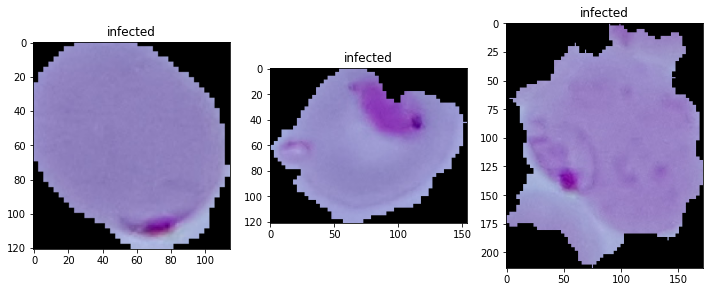

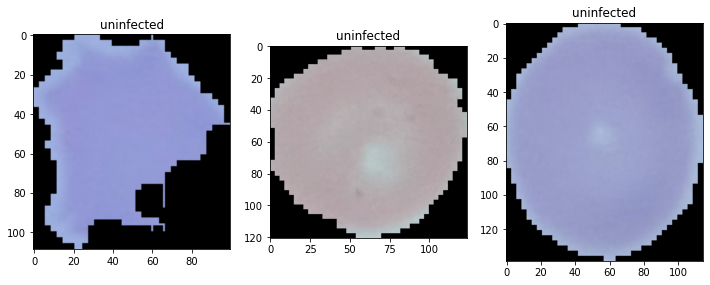

In [12]:
# Plot the image graph

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = cv2.imread('./cell_images/Parasitized/' +infected[i])
    plt.imshow(img)
    plt.title('infected')
plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(1,3,i+1)
    img2 = cv2.imread('./cell_images/Uninfected/'+uninfected[i])
    plt.imshow(img2)
    plt.title('uninfected')

## 7. Initialize the model

In [13]:
malaria_model = Sequential()

## 8. Adding Convolution and Pooling Layers

In [14]:
# Convolution layer + Max Pooling layer 1
malaria_model.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape = (64, 64, 3)))
malaria_model.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape = (64, 64, 3)))
malaria_model.add(MaxPooling2D(2,2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
# Convolution layer + Max Pooling layer 2
malaria_model.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
malaria_model.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
malaria_model.add(MaxPooling2D(2,2))

## 9. Add Flatten/Input Layer


In [16]:
malaria_model.add(Flatten())

## 10. Add Hidden Layers

In [17]:
# Dense Layer + Dropout layer 1
malaria_model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))
malaria_model.add(Dropout(0.25))

# Dense Layer + Dropout layer 2
malaria_model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))
malaria_model.add(Dropout(0.3))

# Dense Layer + Dropout layer 3
malaria_model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))
malaria_model.add(Dropout(0.4)) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 11. Add Ouput Layer

In [18]:
# Use the softmax function for the output layer (categorical classification for 2 output sets)
malaria_model.add(Dense(units = 2, kernel_initializer = "random_uniform", activation ="softmax"))

In [19]:
# CHECK THE MODEL SUMMARY
malaria_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

## 12. Compile the model

In [20]:
# Using Batch Gradient Descent
malaria_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

### Add Early stopping to avoid underfitting or overfitting the model

In [21]:
# Early Stopping
# Objective is to minimize the validation loss with a patience of 5
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## 13. Train the model

> steps per epoch is the number of images the model is trained on -> **number of images in train set / batch size** = 22047/64

> validation steps is the no of images the model tests upon -> no of **images in test set / batch size** = 5511/64

In [22]:
hist = malaria_model.fit_generator(x_train, steps_per_epoch = 344 , epochs = 30 , validation_data = x_test, validation_steps = 86, callbacks=[early_stop] )

Epoch 1/30
344/344 [==============================] - 388s 1s/step - loss: 0.6884 - acc: 0.5360 - val_loss: 0.6773 - val_acc: 0.5525
Epoch 2/30
344/344 [==============================] - 384s 1s/step - loss: 0.3112 - acc: 0.8857 - val_loss: 0.1673 - val_acc: 0.9502
Epoch 3/30
344/344 [==============================] - 384s 1s/step - loss: 0.1716 - acc: 0.9479 - val_loss: 0.1386 - val_acc: 0.9539
Epoch 4/30
344/344 [==============================] - 385s 1s/step - loss: 0.1536 - acc: 0.9532 - val_loss: 0.1375 - val_acc: 0.9531
Epoch 5/30
344/344 [==============================] - 384s 1s/step - loss: 0.1502 - acc: 0.9546 - val_loss: 0.1556 - val_acc: 0.9602
Epoch 6/30
344/344 [==============================] - 386s 1s/step - loss: 0.1426 - acc: 0.9561 - val_loss: 0.1357 - val_acc: 0.9600
Epoch 7/30
344/344 [==============================] - 385s 1s/step - loss: 0.1411 - acc: 0.9564 - val_loss: 0.1226 - val_acc: 0.9608
Epoch 8/30
344/344 [==============================] - 385s 1s/step - 

## 14. Comparing accuracies

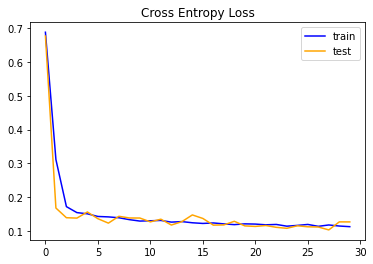

In [23]:
# Plotting the accuracies
import matplotlib.pyplot as plt

# plot training and testing loss
plt.title('Cross Entropy Loss')
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')
plt.legend()

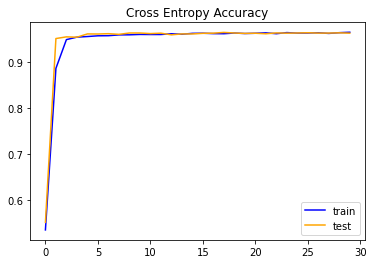

In [25]:
# plot training and testing accuracy
plt.title('Cross Entropy Accuracy')
plt.plot(hist.history['acc'], color='blue', label='train')
plt.plot(hist.history['val_acc'], color='orange', label='test')
plt.legend()

## 15. Saving the model

In [26]:
malaria_model.save('malaria.h5')

In [27]:
# Convert the saved model into a tar file
!tar -zcvf malaria-detection-model.tgz malaria.h5

malaria.h5


## 16. To store the model in Machine Learning Repository

In [30]:
# Install libraries to connect to machine learning service
!pip install watson-machine-learning-client --upgrade

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 538 kB 16.3 MB/s eta 0:00:01


In [31]:
# Replace the credentials received from Watson Machine Learning Service

from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "crhcwbJogxeEQm3v9kpEsCXCmlO_ceDYNqm4G94RuCSF"
}
# connecting my client with ML credentials
client = APIClient(wml_credentials)

In [42]:
# Creating a deployment space and a function to get the metadata of the deployment space
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [43]:
# Calling the space
space_uid = guid_from_space_name(client, 'Malaria_model')
print("Space UID = " + space_uid)

Space UID = c63483e2-98d7-4c8f-918f-f4fb2d49e14e


In [44]:
# Make that as the default space ID
client.set.default_space(space_uid)

'SUCCESS'

In [45]:
# To display software specs
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [46]:
# Using the tensorflow specification
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [48]:
# Storing the model

model_details = client.repository.store_model(model='malaria-detection-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [60]:
model_id

'544b2c3b-11ef-42c3-8ab6-dda94225eeac'

In [71]:
# Download the model
client.repository.download(model_id,'Malaria_prediction.tar.gz')

Successfully saved model content to file: 'Malaria_prediction.tar.gz'


'/home/wsuser/work/Malaria_prediction.tar.gz'

## 17. Testing the model

In [63]:
# Importing Libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [64]:
# Loading the model
malaria_model = load_model ("malaria.h5")

> **a. Testing for Uninfected cell image**

In [65]:
# Load the image

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_e3f18113a9004c37a71ba96538b7d0a9.get_object(Bucket='malariadetection-donotdelete-pr-4smzsi8gu1z77u', Key='Uninfected.png')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 
img = image.load_img(streaming_body_2, target_size=(64, 64))

In [66]:
# Convert the image to array type
x = image.img_to_array(img)

In [67]:
# Expand the dimension to a 4D type
x = np.expand_dims(x, axis = 0)

In [68]:
x.shape

(1, 64, 64, 3)

In [69]:
# Prediction
index = ['Parasitized', 'Uninfected']
pred = np.argmax(malaria_model.predict(x))
index[pred]

'Uninfected'

***Here we can see that the prediction is correct***

> **b. Testing for Parasitized cell image**

In [70]:
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_4 = client_e3f18113a9004c37a71ba96538b7d0a9.get_object(Bucket='malariadetection-donotdelete-pr-4smzsi8gu1z77u', Key='Parasitized.png')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_4, "__iter__"): streaming_body_4.__iter__ = types.MethodType( __iter__, streaming_body_4 ) 

img1 = image.load_img(streaming_body_4, target_size=(64, 64))
y = image.img_to_array(img1)
y = np.expand_dims(y, axis = 0)
pred1 = np.argmax(malaria_model.predict(y))
index[pred1]

'Parasitized'

***Here we can see that the prediction is correct as well***